<a href="https://colab.research.google.com/github/MariiaSam/data_science/blob/main/CV().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:

# Завантажимо дані (припустимо, дані вже збережені в CSV файлі)
file_path = '/content/drive/My Drive/Housing.csv'
data = pd.read_csv(file_path)
data




,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [67]:
# Розділимо дані на ознаки та цільову змінну
X = data[['area', 'bedrooms', 'parking']]  # Приклад ознак
y = data['price']



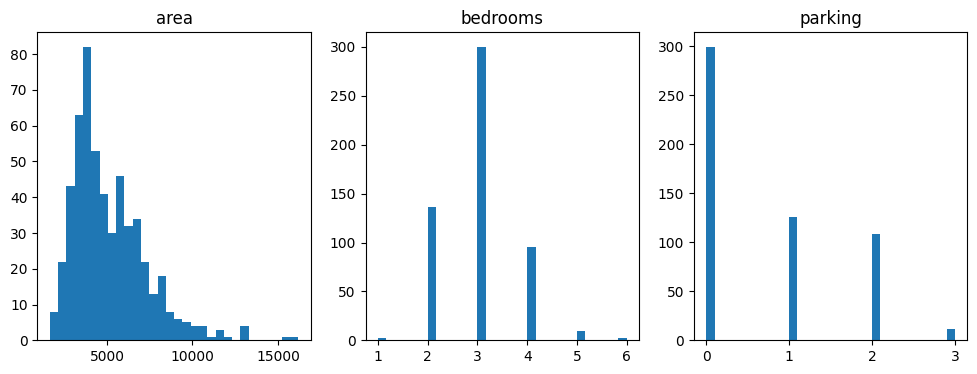

In [68]:
# Візуалізуємо розподіл даних до масштабування
plt.figure(figsize=(12, 4))
for i in range(X.shape[1]):
    plt.subplot(1, X.shape[1], i+1)
    plt.hist(X.iloc[:,i], bins=30)
    plt.title(X.columns[i])
plt.show()

In [69]:

# Стандартизуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

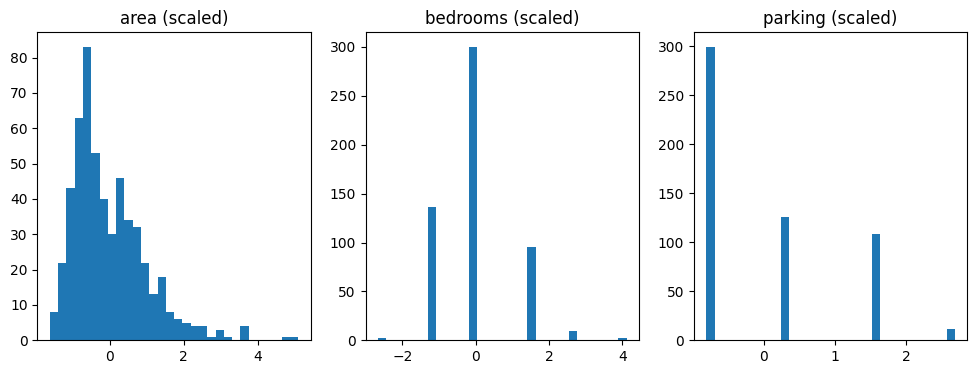

In [70]:
# Візуалізуємо розподіл даних після масштабування
plt.figure(figsize=(12, 4))
for i in range(X_scaled.shape[1]):
    plt.subplot(1, X_scaled.shape[1], i+1)
    plt.hist(X_scaled[:,i], bins=30)
    plt.title(X.columns[i] + ' (scaled)')
plt.show()

In [71]:
# Розділимо дані на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [72]:
# Створимо модель лінійної регресії
model = LinearRegression()



In [73]:
model.fit(X_train, y_train)

# Навчимо модель на навчальних даних


LinearRegression()

In [74]:
# Зробимо прогнози на тестових даних
y_pred = model.predict(X_test)


In [75]:
# Оцінимо якість моделі (наприклад, за допомогою середньоквадратичної похибки)
from sklearn.metrics import mean_squared_error
print('Середньоквадратична похибка:', mean_squared_error(y_test, y_pred))

Середньоквадратична похибка: 3107699653082.39


In [76]:
# Виконаємо 5-fold крос-валідацію
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Крос-валідація:

# Ділимо дані на кілька фолдів (частин).
# Для кожного фолда:
# Використовуємо всі інші фолди для навчання моделі.
# Оцінюємо модель на залишеному фолді (тестовому).
# Обчислюємо метрику якості (наприклад, середньоквадратичну похибку).
# Обчислюємо середнє значення метрик по всіх фолдах.



In [77]:
# Перетворимо негативну середньоквадратичну похибку на позитивну
rmse_scores = np.sqrt(-scores)

print("Середня RMSE:", rmse_scores.mean())

Середня RMSE: 1704241.0544821233


In [ ]:
import numpy as np
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5)

y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)

skfolds = StratifiedKFold(n_splits=4, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))